We can use pre-build functions to apply gradient descend and its variants to our data. 

In particular, the library ```scikit-learn``` has many machine learning algorithms implemented. It is a standard library for most ML applications. 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


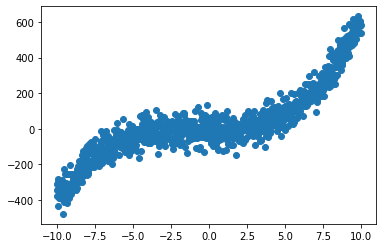

In [56]:
data = pd.read_csv('DataLinearRegression.csv')
x = (data['x'].values).reshape(-1,1)
y = (data['y'].values).reshape(-1,1)

plt.plot(x,y,'o')

We can fit a simple linear model to the data. Les use 80% of the data to train the model and 20% to test the model

In [57]:
n_train = int(len(x)*0.8)
n_test = int(len(x)-n_train)
random_seed = 10 #providing a random seed guarantees that the experiement can be repeated
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=n_train, test_size=n_test, random_state=random_seed)


In [58]:
#check the values 
len(x), len(X_train), len(X_test)

(1000, 800, 200)

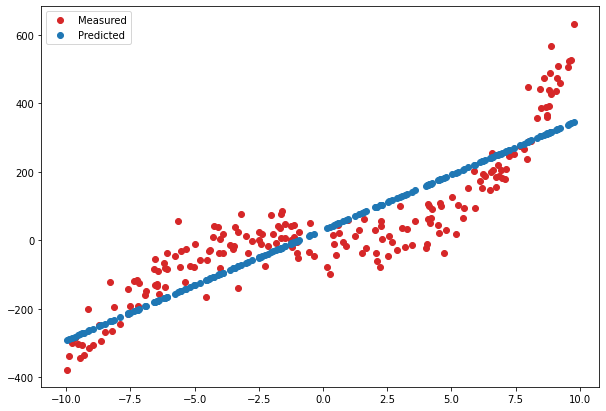

In [59]:
#fit a linear model 
regressor = SGDRegressor(eta0=0.01)

#fit the model with data
regressor.fit(X_train,y_train.ravel());

#make a prediction 
y_pred = regressor.predict(X_test)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(10,7))
plt.plot(X_test, y_test, 'o', label= 'Measured', lw = 3, color='tab:red');
plt.plot(X_test, y_pred, 'o', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.show();

In [64]:
regressor.coef_

array([32.2249888])

We can create a more complex model, say by adding a new column corresponding to $x^2$

In [73]:
X = np.zeros((len(x),2))
X[:,0]=x.ravel()
X[:,1]=X[:,0]**2
print(X[0:30,:])

[[-10.         100.        ]
 [ -9.97997998  99.6000004 ]
 [ -9.95995996  99.2008024 ]
 [ -9.93993994  98.80240601]
 [ -9.91991992  98.40481122]
 [ -9.8998999   98.00801803]
 [ -9.87987988  97.61202644]
 [ -9.85985986  97.21683646]
 [ -9.83983984  96.82244807]
 [ -9.81981982  96.42886129]
 [ -9.7997998   96.03607612]
 [ -9.77977978  95.64409254]
 [ -9.75975976  95.25291057]
 [ -9.73973974  94.8625302 ]
 [ -9.71971972  94.47295143]
 [ -9.6996997   94.08417426]
 [ -9.67967968  93.6961987 ]
 [ -9.65965966  93.30902474]
 [ -9.63963964  92.92265238]
 [ -9.61961962  92.53708163]
 [ -9.5995996   92.15231247]
 [ -9.57957958  91.76834492]
 [ -9.55955956  91.38517897]
 [ -9.53953954  91.00281463]
 [ -9.51951952  90.62125188]
 [ -9.4994995   90.24049074]
 [ -9.47947948  89.8605312 ]
 [ -9.45945946  89.48137327]
 [ -9.43943944  89.10301693]
 [ -9.41941942  88.7254622 ]]


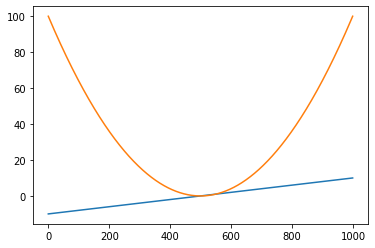

In [75]:
plt.plot(X)

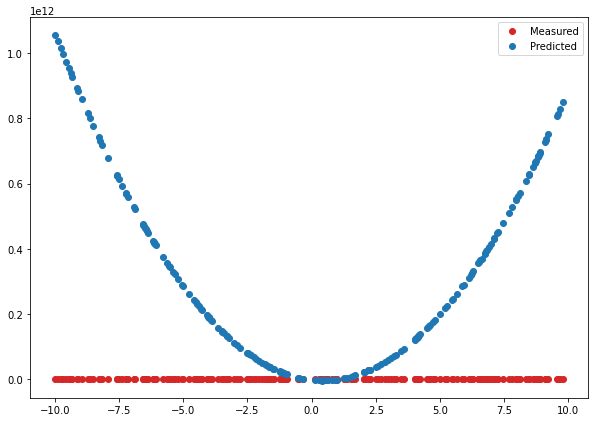

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train, test_size=n_test, random_state=random_seed)
#fit a linear model 
regressor = SGDRegressor(eta0=0.01)

#fit the model with data
regressor.fit(X_train,y_train.ravel());

#make a prediction 
y_pred = regressor.predict(X_test)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(10,7))
plt.plot(X_test[:,0], y_test, 'o', label= 'Measured', lw = 3, color='tab:red');
plt.plot(X_test[:,0], y_pred, 'o', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.show();

The output went nuts!

In this case, the columns of $X$ have very different values 

$$
\begin{bmatrix}
1 & x[0] & x^2[0]  \\
1 & x[1] & x^2[1] \\
1 & x[2] & x^2[2]  \\
\vdots & \vdots & \vdots   \\
1 & x[N] & x^2[N]  \\
\end{bmatrix} = 
\begin{bmatrix}
1 & -10 & 100 \\
1 & -9.97 & 99.6 \\
1 & -9.95 & 99.2  \\
\vdots & \vdots & \vdots \\
1 & 10 & 100  \\
\end{bmatrix} 
$$

and the large difference in values between columns affects the estimated parameters. This is one important limitation of gradient descent, and **you** need to apply manual corrections to make sure that the columns of $X$ have similar values. 

#### Matrix normalization
The goal is that all the columns of the matrix $X$ have similar range of values. That way, one column won't overshadow the other columns. A commonly used normalization procedure is to divide every column by its maximum value, making sure that the maximum value in the columns is one.

```python
normalizer = np.max(X,axis = 0) # takes the maximum of every column
X_normalized = X/normalizer # will divide every column by its maximum 
```


Another common alternative is to make sure that the mean of every column is zero (or some other number) and the standard deviation is 1 (or some other number). This type of normalization is included in scikit learn and is called ```StandardScaler```


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train, test_size=n_test, random_state=random_seed)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

print(f'Mean values original data : {np.mean(X_train,axis=0)} \nStd values original data : {np.std(X_train,axis=0)}')
print(f'Mean values normalized data : {np.mean(X_train_normalized,axis=0)} \nStd values normalized data : {np.std(X_train_normalized,axis=0)}')

Mean values original data : [-0.04119119 33.47225103] 
Std values original data : [ 5.78537417 30.02685232]
Mean values normalized data : [ 1.98452366e-17 -1.17121590e-15] 
Std values normalized data : [1. 1.]


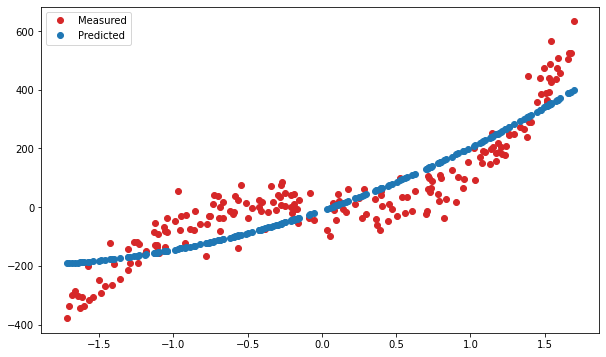

In [77]:
regressor = SGDRegressor()

#fit the model with data
regressor.fit(X_train_normalized,y_train.ravel());

#make a prediction 
y_pred = regressor.predict(X_test_normalized)


#plot the result
fig,ax = plt.subplots(1,1,figsize=(10,6))
plt.plot(X_test_normalized[:,0], y_test, 'o', label= 'Measured', lw = 3, color='tab:red');
plt.plot(X_test_normalized[:,0], y_pred, 'o', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.show();

In [79]:
regressor.coef_

array([174.71887272,  36.02026403])

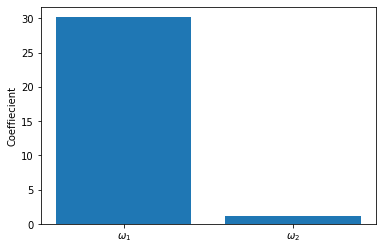

In [78]:
#we can also plot the coefficients 

#de normalize the coeficients
coefficients = np.true_divide(regressor.coef_,  scaler.scale_) 
plt.bar(range(len(coefficients)),coefficients)
plt.xticks(range(len(coefficients)), ['$\omega_{1}$','$\omega_{2}$'])
plt.ylabel('Coeffiecient')
plt.show();

## Quiz

Load the $x$ and $y$ variables provided in the file ```DataLinearRegression.csv```

```python
data = pd.read_csv('DataLinearRegression.csv')
x = (data['x'].values).reshape(-1,1)
y = (data['y'].values).reshape(-1,1)

```

Create a regressor matrix with 5 columns corresponding to 
$$
[x, x^2, x^3, x^4, x^5]
$$

Split your data in 80% for training and 20% for validation and use gradient descend to compute the coefficients of the model 

$$
\hat{y} = w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 + w_5 x^5
$$

Plot the model prediction and the estimated coefficients. Explain your results. 

